<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Customer Segmentation & Recommendation System


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Problem:
- In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the https://archive.ics.uci.edu/dataset/352/online+retail UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

Objectives:
-  Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
-  Feature Engineering: Develop new features based on the transactional data to 
- create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Table of Contents:

### Step 1 | Setup and Initialization
- **Step 1.1 | Importing Necessary Libraries**
- **Step 1.2 | Loading the Dataset**

### Step 2 | Initial Data Analysis
- **Step 2.1 | Dataset Overview**
- **Step 2.2 | Summary Statistics**

### Step 3 | Data Cleaning & Transformation
- **Step 3.1 | Handling Missing Values**
- **Step 3.2 | Handling Duplicates**
- **Step 3.3 | Treating Cancelled Transactions**
- **Step 3.4 | Correcting StockCode Anomalies**
- **Step 3.5 | Cleaning Description Column**
- **Step 3.6 | Treating Zero Unit Prices**
- **Step 3.7 | Outlier Treatment**

### Step 4 | Feature Engineering
- **Step 4.1 | RFM Features**
  - **Step 4.1.1 | Recency (R)**
  - **Step 4.1.2 | Frequency (F)**
  - **Step 4.1.3 | Monetary (M)**
- **Step 4.2 | Product Diversity**
- **Step 4.3 | Behavioral Features**
- **Step 4.4 | Geographic Features**
- **Step 4.5 | Cancellation Insights**
- **Step 4.6 | Seasonality & Trends**

### Step 5 | Outlier Detection and Treatment

### Step 6 | Correlation Analysis

### Step 7 | Feature Scaling

### Step 8 | Dimensionality Reduction

### Step 9 | K-Means Clustering
- **Step 9.1 | Determining the Optimal Number of Clusters**
  - **Step 9.1.1 | Elbow Method**
  - **Step 9.1.2 | Silhouette Method**
- **Step 9.2 | Clustering Model - K-means**

### Step 10 | Clustering Evaluation
- **Step 10.1 | 3D Visualization of Top Principal Components**
- **Step 10.2 | Cluster Distribution Visualization**
- **Step 10.3 | Evaluation Metrics**

### Step 11 | Cluster Analysis and Profiling
- **Step 11.1 | Radar Chart Approach**
- **Step 11.2 | Histogram Chart Approach**

### Step 12 | Recommendation System


## Let's get started:



# Step 1 | Setup and Initialization



## Step 1.1 | Importing Necessary Libraries


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [1]:
 # Ignore warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [2]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [3]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

## Step 1.2 | Loading the Dataset¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Next, I will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [4]:

import os
print(os.getcwd())


c:\Users\sasi virat\Customer-Segmentation-Recommendation-System\PythonNotebook


In [5]:

# Load the Excel dataset correctly
df = pd.read_excel("Online Retail.xlsx")


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Dataset Description

| **Variable**   | **Description**                                                                 |
|----------------|---------------------------------------------------------------------------------|
| **InvoiceNo**  | Code representing each unique transaction. If this code starts with letter 'c', it indicates a cancellation. |
| **StockCode**  | Code uniquely assigned to each distinct product.                                |
| **Description**| Description of each product.                                                   |
| **Quantity**   | The number of units of a product in a transaction.                             |
| **InvoiceDate**| The date and time of the transaction.                                           |
| **UnitPrice**  | The unit price of the product in sterling.                                     |
| **CustomerID** | Identifier uniquely assigned to each customer.                                 |
| **Country**    | The country of the customer.                                                   |


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Step 2 | Initial Data Analysis

In this step, we perform an initial exploration of the dataset to understand its structure, identify any missing values, and detect any outliers or anomalies that may need further attention.

## Key Actions:
1. **Check Data Types**: Inspect the data types of each variable to ensure they align with expectations.
2. **Missing Values**: Identify any missing or null values in the dataset.
3. **Summary Statistics**: Calculate basic summary statistics such as mean, median, and standard deviation.
4. **Data Distribution**: Visualize the distribution of key variables (e.g., `Quantity`, `UnitPrice`).
5. **Outliers Detection**: Look for any extreme values or outliers in numerical columns.
6. **Categorical Analysis**: Examine the distribution of categorical variables like `Country` and `Description`.

## Example Code Snippet:

```python
import pandas as pd

# Load the dataset
df = pd.read_excel('path_to_dataset/Online Retail.xlsx')

# Check the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical columns
print(df.describe())

# Data types of each column
print(df.dtypes)


## Afterward, I am going to gain a thorough understanding of the dataset before proceeding to the data cleaning and transformation stages.

## Step 2.1 | Dataset Overview¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## First I will perform a preliminary analysis to understand the structure and types of data columns:

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inferences

The dataset consists of 541,909 entries and 8 columns. Below is a brief overview of each column:

- **InvoiceNo**: An object data type column that contains the invoice number for each transaction. Each invoice number can represent multiple items purchased in a single transaction.
- **StockCode**: An object data type column representing the product code for each item.
- **Description**: An object data type column that contains descriptions of the products. It has some missing values, with 540,455 non-null entries out of 541,909.
- **Quantity**: An integer column indicating the quantity of products purchased in each transaction.
- **InvoiceDate**: A datetime column that records the date and time of each transaction.
- **UnitPrice**: A float column representing the unit price of each product.
- **CustomerID**: A float column containing the customer ID for each transaction. This column has a significant number of missing values, with only 406,829 non-null entries out of 541,909.
- **Country**: An object column recording the country where each transaction took place.

### Observations:
- There are missing values in the **Description** and **CustomerID** columns which need to be addressed.
- The **InvoiceDate** column is already in datetime format, which will facilitate further time series analysis.
- It appears that a single customer can have multiple transactions, as inferred from the repeated **CustomerID** in the initial rows.

### Next Steps:
- **Data Cleaning**: Handle missing values in the **Description** and **CustomerID** columns.
- **Preprocessing**: Investigate and address any potentially erroneous data.
- **Feature Engineering**: Create new features that can help achieve the project goals, such as aggregating transactions or calculating total spend per customer.

This in-depth overview helps us focus on the key aspects of the dataset as we proceed with further cleaning and analysis.


## Step 2.2 |  Summary Statistics

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Now, I am going to generate summary statistics to gain initial insights into the data distribution:

In [8]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [9]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,541909,38,United Kingdom,495478


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inferences

### Quantity:
- The average quantity of products in a transaction is approximately 9.55.
- The quantity has a wide range, with a minimum value of -80,995 and a maximum value of 80,995. The negative values indicate returned or cancelled orders, which need to be handled appropriately.
- The standard deviation is quite large, indicating a significant spread in the data. The presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.

### UnitPrice:
- The average unit price of the products is approximately 4.61.
- The unit price also shows a wide range, from -11,062.06 to 38,970, suggesting the presence of errors or noise in the data, as negative prices don't make sense.
- Similar to the **Quantity** column, the presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.

### CustomerID:
- There are 406,829 non-null entries, indicating missing values in the dataset that need to be addressed.
- The Customer IDs range from 12,346 to 18,287, helping identify unique customers.

### InvoiceNo:
- There are 25,900 unique invoice numbers, indicating 25,900 separate transactions.
- The most frequent invoice number is 573585, appearing 1,114 times, possibly representing a large transaction or an order with multiple items.

### StockCode:
- There are 4,070 unique stock codes representing different products.
- The most frequent stock code is 85123A, appearing 2,313 times in the dataset.

### Description:
- There are 4,223 unique product descriptions.
- The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER", appearing 2,369 times.
- There are some missing values in this column which need to be treated.

### Country:
- The transactions come from 38 different countries, with the dominant majority of the transactions (approximately 91.4%) originating from the United Kingdom.


## Step 3 | Data Cleaning & Transformation

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## This step encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes addressing missing values, eliminating duplicate entries, correcting anomalies in product codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling.

## Step 3.1 | Handling Missing Values¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Initially, I will determine the percentage of missing values present in each column, followed by selecting the most effective strategy to address them:

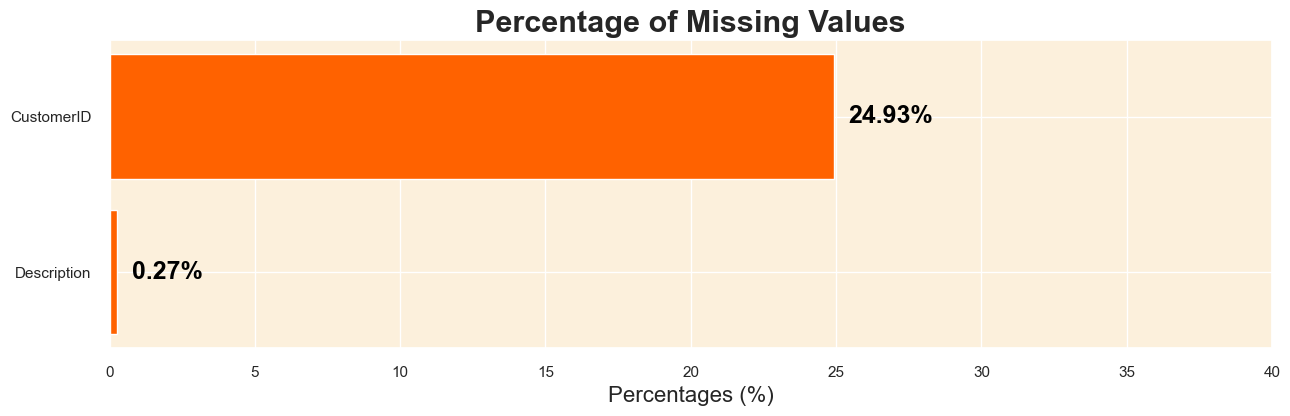

In [10]:
# Calculating the percentage of missing values for each column

missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Handling Missing Values Strategy

### CustomerID (24.93% missing values)

The **CustomerID** column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.

Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing **CustomerID** values seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

### Description (0.27% missing values)

The **Description** column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same **StockCode** does not always have the same **Description**. This indicates data quality issues and potential errors in the product descriptions.

Given these inconsistencies, imputing the missing descriptions based on **StockCode** might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing **Descriptions** to avoid propagating errors and inconsistencies into the subsequent analyses.

### Conclusion

By removing rows with missing values in the **CustomerID** and **Description** columns, we aim to construct a cleaner and more reliable dataset. This will be crucial for achieving accurate clustering and creating an effective recommendation system.


In [11]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [12]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [13]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

## Step 3.2 | Handling Duplicates¶


## Next, I am going to recognize duplicate rows in the dataset:

In [14]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Handling Duplicates Strategy

In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system.

### Strategy:
- **Remove Completely Identical Rows**: Since these rows are likely errors, removing them will help in achieving a cleaner dataset.
- **Impact**: This step will aid in building more accurate customer clusters based on their unique purchasing behaviors. Moreover, it will help in creating a more precise recommendation system by correctly identifying the products with the most purchases.

By removing the duplicate rows, we ensure that the dataset represents genuine transactions, which is critical for the accuracy of the subsequent analyses and models.


In [15]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [16]:
# Getting the number of rows in the dataframe
df.shape[0]

401604

## Step 3.3 | Treating Cancelled Transactions¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## To refine our understanding of customer behavior and preferences, we need to take into account the transactions that were cancelled. Initially, we will identify these transactions by filtering the rows where the InvoiceNo starts with "C". Subsequently, we will analyze these rows to understand their common characteristics or patterns:

In [17]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,InvoiceDate,UnitPrice
count,8872.000000,8872,8872.000000
mean,-30.774910,2011-06-27 09:06:05.024797184,18.899512
min,-80995.000000,2010-12-01 09:41:00,0.010000
25%,-6.000000,2011-03-23 11:23:45,1.450000
50%,-2.000000,2011-07-11 13:51:00,2.950000
75%,-1.000000,2011-10-06 20:36:00,4.950000
max,-1.000000,2011-12-09 11:58:00,38970.000000
std,1172.249902,NaN,445.190864


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inferences from the Cancelled Transactions Data

- **Quantity**: All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.
- **Unit`Price**: The **UnitPrice** column has a considerable spread, showing that a variety of products, ranging from low to high value, were part of the cancelled transactions.

These insights help to identify the nature of cancelled transactions and can guide further analysis on how cancellations impact the overall business, product sales, and customer behavior.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Strategy for Handling Cancelled Transactions

Considering the project's objective to cluster customers based on their purchasing behavior and preferences, and to eventually create a recommendation system, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:

1. **Enhance the Clustering Process**: By incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferences, the clustering process will become more insightful.
2. **Improve the Recommendation System**: The recommendation system can potentially prevent suggesting products that have a high likelihood of being cancelled, thereby improving the quality of recommendations.

Retaining and marking cancelled transactions will provide valuable insights and contribute to more informed clustering and recommendation processes.


In [18]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


## Step 3.4 | Correcting StockCode Anomalies¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## First of all, lets find the number of unique stock codes and to plot the top 10 most frequent stock codes along with their percentage frequency:

In [19]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


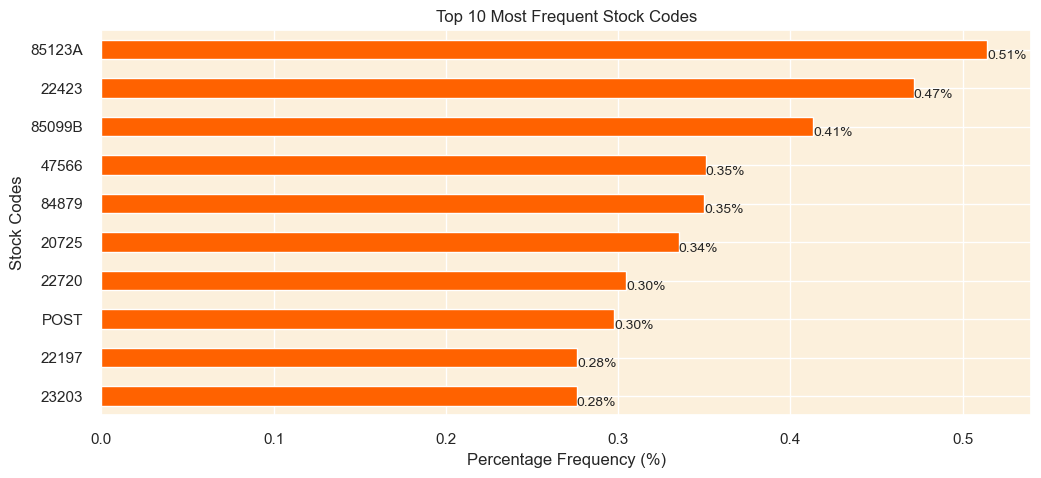

In [20]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inferences on Stock Codes

### Product Variety:
- The dataset contains 3,684 unique stock codes, indicating a substantial variety of products available in the online retail store. This diversity can potentially lead to the identification of distinct customer clusters, with preferences for different types of products.

### Popular Items:
- A closer look at the top 10 most frequent stock codes can offer insights into the popular products or categories that are frequently purchased by customers.

### Stock Code Anomalies:
- Most stock codes are composed of 5 or 6 characters, but there are some anomalies, like the code 'POST'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products.
- To maintain the focus of the project—clustering based on product purchases and creating a recommendation system—these anomalies should be further investigated and possibly treated appropriately to ensure data integrity.

By addressing these anomalies and analyzing product variety, we can gain valuable insights into customer preferences and improve the clustering and recommendation systems.


## To delve deeper into identifying these anomalies, let's explore the frequency of the number of numeric characters in the stock codes, which can provide insights into the nature of these unusual entries:

In [21]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inference on Stock Codes with Anomalies

The output indicates the following:

- A majority of the unique stock codes (3,676 out of 3,684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.
- There are a few anomalies:
  - 7 stock codes contain **no numeric characters**.
  - 1 stock code contains **only 1 numeric character**.

These anomalies clearly deviate from the standard format and need further investigation to understand their nature and whether they represent valid product transactions.

### Next Steps:
- Identify the stock codes that contain 0 or 1 numeric characters to further explore these anomalies and determine their relevance to the analysis.


In [22]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


## Let's calculate the percentage of records with these anomalous stock codes:



In [23]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inference on Anomalous Stock Codes

Based on the analysis, we find that a very small proportion of the records, **0.48%**, have anomalous stock codes that deviate from the typical format observed in the majority of the data. These anomalous codes represent only **8 out of 3,684** unique stock codes.

These codes seem to represent **non-product transactions**, such as:
- "BANK CHARGES"
- "POST" (possibly postage fees)

### Conclusion:
Since these anomalous codes do not represent actual products and make up a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system. Therefore, these anomalies should be excluded from the analysis to maintain data integrity.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Strategy for Handling Anomalous Stock Codes

Given the context of the project, where the aim is to cluster customers based on their product purchasing behaviors and develop a product recommendation system, it would be prudent to **exclude** the records with anomalous stock codes from the dataset. 

By doing this, the focus remains strictly on **genuine product transactions**, which will lead to a more accurate and meaningful analysis, ensuring that the clustering and recommendation system are not influenced by non-product transactions like "BANK CHARGES" or "POST" (postage fees).


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Thus, the strategy would be to filter out and remove rows with these anomalous stock codes from the dataset before proceeding with further analysis and model development:

In [24]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [25]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

## Step 3.5 | Cleaning Description Column¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## First, I will calculate the occurrence count of each unique description in the dataset. Then, I will plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset:

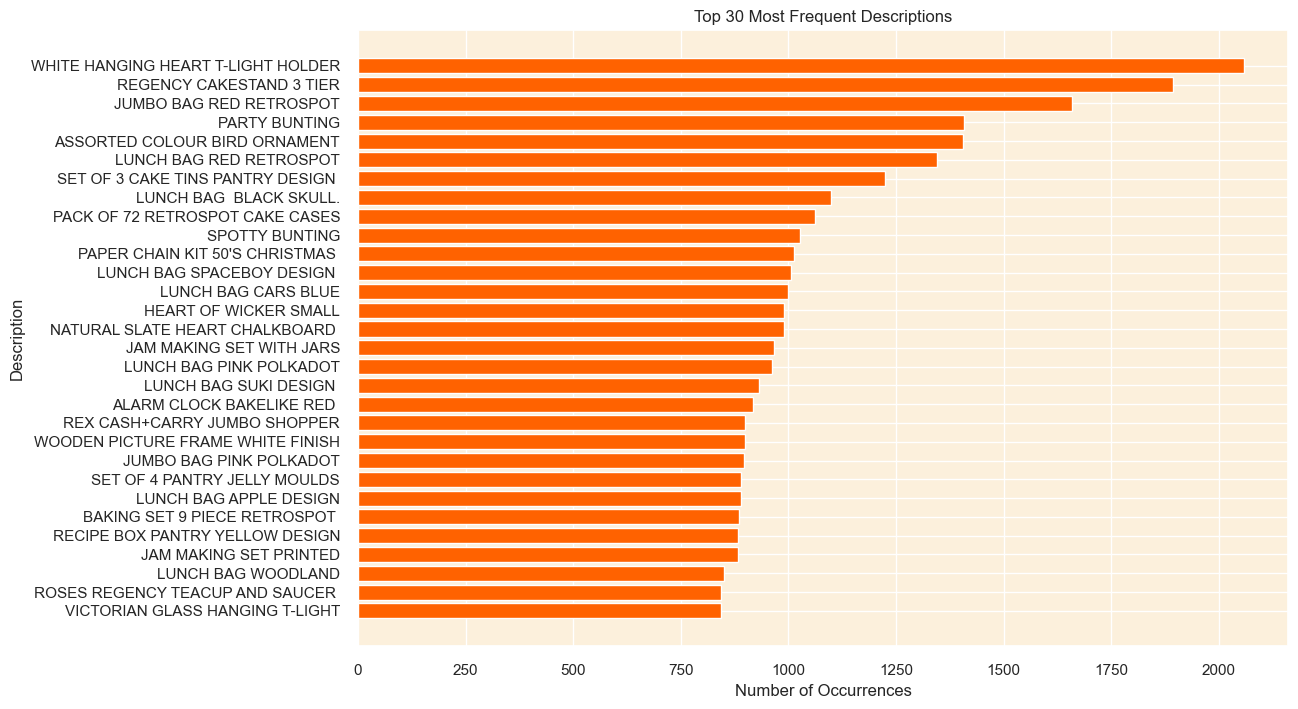

In [26]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inferences on Descriptions

- The most frequent descriptions are generally household items, particularly those associated with kitchenware, lunch bags, and decorative items.
- Interestingly, **all the descriptions** are in uppercase, which might be a standardized format for entering product descriptions in the database.
- However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in **lowercase** or a **mix of case styles**.

This step will help to identify any additional inconsistencies in the descriptions and ensure that the data is standardized before proceeding with further analysis.


In [27]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inference on Descriptions Containing Lowercase Characters

Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are **not product descriptions**, such as:
- "Next Day Carriage"
- "High Resolution Image"

These entries seem to be unrelated to the actual products and might represent other types of information or service details.

### Conclusion:
These non-product descriptions should be treated separately or removed to maintain the focus on genuine product-related information, ensuring the analysis remains accurate and meaningful.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Strategy for Handling Descriptions

### Step 1: Remove Service-Related Information
- Remove the rows where the descriptions contain service-related information like "Next Day Carriage" and "High Resolution Image", as these do not represent actual products and would not contribute to the clustering and recommendation system we aim to build.

### Step 2: Standardize Case Format
- For the remaining descriptions with mixed case, standardize the text to **uppercase** to maintain uniformity across the dataset. This will also assist in reducing the chances of having duplicate entries with different case styles.

By implementing the above strategy, we can enhance the quality of our dataset, making it more suitable for the analysis and modeling phases of our project.


In [28]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [29]:
# Getting the number of rows in the dataframe
df.shape[0]

399606

## Step 3.6 | Treating Zero Unit Prices¶

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## In this step, first I am going to take a look at the statistical description of the UnitPrice column:

In [30]:
df['UnitPrice'].describe()


count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inference on Zero Unit Price Transactions

The minimum unit price value is **zero**, which suggests that there are some transactions where the unit price is zero. This could indicate:
- A **free item** in the transaction.
- A **data entry error**.

### Next Steps:
- To understand the nature of these zero unit price transactions, it is essential to investigate further.
- A detailed analysis of the **product descriptions** associated with zero unit prices will be conducted to determine if they adhere to a specific pattern.

By conducting this analysis, we can discern whether these zero unit price transactions are valid or should be treated as anomalies in the dataset.


In [31]:
df[df['UnitPrice']==0].describe()[['Quantity']]


,Quantity
count,33.000000
mean,420.515152
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000
std,2176.713608


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Inferences on Unit Price of Zero

- The transactions with a **unit price of zero** are relatively few in number (**33 transactions**).
- These transactions have a large variability in the **quantity of items** involved, ranging from 1 to 12,540, with a substantial standard deviation.

### Conclusion:
- Including these transactions in the clustering analysis might introduce **noise** and could potentially distort the **customer behavior patterns** identified by the clustering algorithm.
- These zero-priced transactions should be removed or handled separately to ensure the accuracy of the clustering and recommendation system.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Strategy for Handling Zero Unit Price Transactions

Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to **remove these transactions** from the dataset. 

This would help in:
- Maintaining a **cleaner and more consistent dataset**.
- Ensuring the accuracy and reliability of the **clustering model** and **recommendation system**.

By excluding these zero-priced transactions, we can focus on valid product purchases and improve the quality of the analysis.


In [32]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

## Step 3.7 | Outlier Treatment¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Strategy for Handling Outliers in K-Means Clustering

In K-means clustering, the algorithm is sensitive to both the **scale of data** and the **presence of outliers**, as they can significantly influence the position of centroids, potentially leading to incorrect cluster assignments. 

However, considering the context of this project, where the final goal is to understand **customer behavior and preferences** through K-means clustering, it would be more prudent to address the issue of **outliers after the feature engineering phase**. This is because:
- The current data is transactional, and removing outliers might eliminate valuable information.
- Outliers could potentially play a crucial role in segmenting customers later on.

Therefore, **outlier treatment will be postponed** and we will proceed to the next stage for now, focusing on creating a **customer-centric dataset** before addressing outliers in subsequent analysis.


In [33]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [34]:
# Getting the number of rows in the dataframe
df.shape[0]

399573

## Step 4 | Feature Engineering

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data:

## Step 4.1 | RFM Features¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# RFM Analysis Overview

RFM is a method used for analyzing customer value and segmenting the customer base. It stands for:

### Recency (R)
- **Recency** indicates how recently a customer has made a purchase.
- A **lower recency value** means the customer has purchased more recently, indicating **higher engagement** with the brand.

### Frequency (F)
- **Frequency** signifies how often a customer makes a purchase within a certain period.
- A **higher frequency value** suggests a customer who interacts with the business more often, indicating **higher loyalty** or **satisfaction**.

### Monetary (M)
- **Monetary** represents the total amount of money a customer has spent over a certain period.
- Customers with a **higher monetary value** have contributed more to the business, indicating **high potential lifetime value**.

### Conclusion:
Together, these metrics help in understanding a customer's **buying behavior** and preferences, which is crucial for:
- Personalizing **marketing strategies**.
- Creating a **recommendation system** that can increase customer satisfaction and business revenue.


## Step 4.1.1 | Recency (R)¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Feature Definition: Days Since Last Purchase

In this step, we focus on understanding how **recently** a customer has made a purchase. This is a crucial aspect of **customer segmentation** as it helps in identifying the **engagement level** of customers.

### Days Since Last Purchase
- **Definition**: This feature represents the **number of days** that have passed since the customer's last purchase.
- A **lower value** indicates that the customer has purchased **recently**, implying a **higher engagement level** with the business.
- A **higher value** may indicate a **lapse** or decreased engagement.

### Importance:
By understanding the recency of purchases, businesses can:
- Tailor **marketing strategies** to **re-engage customers** who have not made purchases in a while.
- Enhance **customer retention** and foster **loyalty** by identifying and targeting customers at risk of churn.


In [35]:

# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

## Now, customer_data dataframe contains the Days_Since_Last_Purchase feature:

In [36]:
customer_data.head()


,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


# Note: Customer-Centric DataFrame

I've named the customer-centric dataframe as **customer_data**, which will eventually contain all the **customer-based features** we plan to create.


## Step 4.1.2 | Frequency (F)¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Feature Creation: Frequency Metrics

In this step, we are going to create two features that quantify the frequency of a customer's engagement with the retailer:

### 1. Total Transactions
- **Definition**: This feature represents the **total number of transactions** made by a customer.
- **Purpose**: It helps in understanding the **engagement level** of a customer with the retailer. More transactions typically indicate higher engagement.

### 2. Total Products Purchased
- **Definition**: This feature indicates the **total number of products** (sum of quantities) purchased by a customer across all transactions.
- **Purpose**: It provides insight into the **buying behavior** of the customer in terms of the volume of products purchased.

### Importance:
- These features will be crucial for segmenting customers based on their **buying frequency**, which is key in:
  - Determining customer segments for **targeted marketing**.
  - Personalizing **recommendations** to improve customer engagement and satisfaction.


In [37]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


## Step 4.1.3 | Monetary (M)¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Feature Creation: Monetary Metrics

In this step, we are going to create two features that represent the **monetary aspect** of a customer's transactions:

### 1. Total Spend
- **Definition**: This feature represents the **total amount of money** spent by each customer.
- **Calculation**: It is calculated as the sum of the product of **UnitPrice** and **Quantity** for all transactions made by a customer.
- **Purpose**: This feature helps in identifying the **total revenue** generated by each customer, which is a direct indicator of a customer's **value** to the business.

### 2. Average Transaction Value
- **Definition**: This feature represents the **average value of a transaction** carried out by a customer.
- **Calculation**: It is calculated as the **Total Spend** divided by the **Total Transactions** for each customer.
- **Purpose**: This metric helps in understanding the **spending behavior** of customers per transaction, which can assist in tailoring **marketing strategies** and offers to different customer segments based on their average spending patterns.

### Importance:
- These features will be essential for segmenting customers based on their **monetary value**, allowing for:
  - Better customer targeting based on their **spending patterns**.
  - Personalized **recommendations** and promotions that align with a customer's purchasing capacity.


In [38]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


## Step 4.2 | Product Diversity¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Feature Creation: Product Diversity

In this step, we are going to understand the **diversity in product purchase behavior** of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. 

### Unique Products Purchased
- **Definition**: This feature represents the **number of distinct products** bought by a customer.
- **Purpose**: A higher value indicates that the customer has a **diverse taste** or preference, buying a wide range of products. In contrast, a lower value may indicate that the customer has a **focused** or **specific preference** for certain products.
- **Importance**: 
  - This feature helps in understanding the **product variety** in a customer's purchases.
  - Segmenting customers based on **product diversity** can enhance personalized marketing strategies, by recommending a broader range of products to customers who have shown interest in various types of items.
  - This can also improve the **product recommendation system**, as it highlights customers' openness to exploring different product categories.

### Example:
- If a customer has bought items across multiple categories, such as electronics, clothing, and home goods, their "Unique Products Purchased" feature will be high, indicating a broader interest range.
- If a customer only buys items from one category, like kitchenware, their feature value will be low, reflecting more specific buying behavior.


In [39]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


## Step 4.3 | Behavioral Features¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Feature Creation: Customer Shopping Behavior

In this step, we aim to understand and capture the **shopping patterns and behaviors** of customers. These features will give us insights into the customers' preferences regarding **when** they like to shop, which can be crucial for personalizing their shopping experience.

### 1. Average Days Between Purchases
- **Definition**: This feature represents the **average number of days** a customer waits before making another purchase.
- **Purpose**: 
  - Understanding this behavior can help in **predicting** when the customer is likely to make their next purchase. 
  - This metric is important for **targeted marketing** and **personalized promotions**, as it helps businesses anticipate customer re-engagement and tailor marketing strategies accordingly.
  
### 2. Favorite Shopping Day
- **Definition**: This feature identifies the **day of the week** when the customer shops the most.
- **Purpose**: 
  - Knowing a customer's favorite shopping day can help segment customers based on their preferred days for shopping. 
  - This information can be used to optimize **marketing strategies** and **promotions** for specific days, ensuring customers receive relevant offers at the right time.

### 3. Favorite Shopping Hour
- **Definition**: This feature identifies the **hour of the day** when the customer shops the most.
- **Purpose**: 
  - Knowing when customers are most active helps in timing **marketing campaigns** and promotions to coincide with when customers are most likely to engage. 
  - This can lead to more efficient marketing spend and improved conversion rates, as promotions are delivered when they are most likely to be noticed.

### Example:
- A customer who makes purchases every 2 days on average will have a low value for "Average Days Between Purchases" and will likely need frequent re-engagement.
- A customer who consistently shops on Fridays could have a "Favorite Shopping Day" of Friday, which would help in customizing Friday promotions.
- A customer who tends to shop at 8 PM could have their "Favorite Shopping Hour" set to 8 PM, aiding in scheduling evening promotions for better reach.

By including these behavioral features in our dataset, we can create a more **rounded view of our customers**, enhancing the **effectiveness** of the clustering algorithm, which will lead to **more meaningful customer segments**.


In [40]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16


## Step 4.4 | Geographic Features¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Feature Creation: Geographic Location of Customers

In this step, we will introduce a **geographic feature** that reflects the **geographical location of customers**. Understanding the geographic distribution of customers is pivotal for several reasons:

### 1. Country
- **Definition**: This feature identifies the **country** where each customer is located.
- **Purpose**:
  - Including the country data helps us understand **region-specific buying patterns** and preferences.
  - Different regions may have varying preferences, which can be critical in **personalizing marketing strategies** and tailoring offers based on local demand.
  - Geographic data also assists in **inventory planning**, ensuring that popular products in specific regions are stocked in sufficient quantities.
  - Furthermore, it can play a significant role in **logistics and supply chain optimization**, helping the business improve **shipping and delivery operations** by tailoring to region-specific challenges, such as delivery time or cost.

### Example:
- A customer located in the **United Kingdom** might show a preference for different products or brands compared to customers in **Germany** or **Australia**. By analyzing geographic patterns, we can target customers with **localized marketing campaigns** that highlight products and promotions popular in their country.
- Geographic data can also provide insights into optimal **shipping routes**, determining which regions require faster deliveries or special handling to improve customer satisfaction.

By incorporating the **Country** feature, we gain a clearer view of regional preferences, which will help in **personalizing** marketing efforts, enhancing **inventory management**, and improving **supply chain** efficiency.


In [41]:
df['Country'].value_counts(normalize=True).head()


Country
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Feature Creation: Binary Geographic Indicator for the United Kingdom

### Inference:
Given that a substantial portion (89%) of transactions are originating from the **United Kingdom**, it would be beneficial to create a **binary feature** indicating whether the transaction is from the **UK** or not. This approach offers several advantages:

### 1. Simplifies the Data:
- By creating a binary feature (e.g., **UK Transaction**), we reduce the complexity of the feature space without losing critical geographical information.
- This can be particularly useful for algorithms like **K-means clustering**, which are sensitive to the **dimensionality of the feature space**. A binary feature would allow the model to capture geographic insights more efficiently.

### 2. Reduces Noise:
- Since the majority of transactions are from the UK, this binary feature focuses on the **UK vs. Non-UK** distinction, potentially reducing noise from minor geographic variations and helping the clustering algorithm focus on more meaningful customer segmentation patterns.

### 3. Benefits in Marketing and Logistics:
- A binary UK indicator can help streamline **marketing efforts**, **product recommendations**, and **shipping strategies**, allowing targeted approaches to customers in or outside the UK.

### Example:
- **UK Transaction** feature: `1` for transactions from the **United Kingdom**, and `0` for transactions from all other countries.
- This will help improve **model efficiency** while preserving critical insights into regional differences.

By implementing this binary geographic feature, we can **maintain simplicity** in the dataset while still capturing valuable geographic distinctions that can influence customer behavior.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

# Step 1: Group the data by CustomerID and Country, and calculate the number of transactions per country for each customer.
country_transactions = customer_data.groupby(['CustomerID', 'Country']).size().reset_index(name='TransactionCount')

# Step 2: Identify the main country for each customer (the country with the maximum transactions).
main_country = country_transactions.loc[country_transactions.groupby('CustomerID')['TransactionCount'].idxmax()]

# Step 3: Create a binary column indicating whether the customer is from the UK or not.
main_country['IsUK'] = main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Step 4: Merge this information back into the customer_data dataframe to include the new feature.
customer_data = customer_data.merge(main_country[['CustomerID', 'IsUK']], on='CustomerID', how='left')


In [42]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0


In [43]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

## Step 4.5 | Cancellation Insights¶



<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">


### Cancellation Features:

- **Cancellation Frequency**: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

- **Cancellation Rate**: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.

By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.


In [44]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)
# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


## Step 4.6 | Seasonality & Trends


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Seasonality and Trends Features:

- **Monthly_Spending_Mean**: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.

- **Monthly_Spending_Std**: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.

- **Spending_Trend**: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions.


In [45]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)
# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

In [46]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types

customer_data = customer_data.convert_dtypes()

In [47]:
customer_data.head(10)


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
5,12352.0,36,8,463,1265.41,158.17625,57,3.13253,1,14,0,1,0.125,316.3525,134.700629,9.351
6,12353.0,204,1,20,89.0,89.0,4,0.0,3,17,0,0,0.0,89.0,0.0,0.0
7,12354.0,232,1,530,1079.4,1079.4,58,0.0,3,13,0,0,0.0,1079.4,0.0,0.0
8,12355.0,214,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0,0.0
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0,0.0,829.143333,991.462585,-944.635


In [48]:
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Total_Transactions              4282 non-null   Int64  
 3   Total_Products_Purchased        4282 non-null   Int64  
 4   Total_Spend                     4282 non-null   Float64
 5   Average_Transaction_Value       4282 non-null   Float64
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Average_Days_Between_Purchases  4282 non-null   Float64
 8   Day_Of_Week                     4282 non-null   Int32  
 9   Hour                            4282 non-null   Int32  
 10  Is_UK                           4282 non-null   Int64  
 11  Cancellation_Frequency          4282 non-null   Int64  
 12  Cancellation_Rate               42

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Let's review the descriptions of the columns in our newly created customer_data dataset:

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Customer Dataset Description:

| **Variable**                    | **Description**                                                                                          |
|----------------------------------|----------------------------------------------------------------------------------------------------------|
| **CustomerID**                   | Identifier uniquely assigned to each customer, used to distinguish individual customers.                  |
| **Days_Since_Last_Purchase**     | The number of days that have passed since the customer's last purchase.                                   |
| **Total_Transactions**           | The total number of transactions made by the customer.                                                   |
| **Total_Products_Purchased**    | The total quantity of products purchased by the customer across all transactions.                        |
| **Total_Spend**                  | The total amount of money the customer has spent across all transactions.                                |
| **Average_Transaction_Value**    | The average value of the customer's transactions, calculated as total spend divided by the number of transactions. |
| **Unique_Products_Purchased**   | The number of different products the customer has purchased.                                            |
| **Average_Days_Between_Purchases** | The average number of days between consecutive purchases made by the customer.                        |
| **Day_Of_Week**                  | The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday). |
| **Hour**                         | The hour of the day when the customer prefers to shop, represented in a 24-hour format.                  |
| **Is_UK**                        | A binary variable indicating whether the customer is based in the UK (1) or not (0).                    |
| **Cancellation_Frequency**       | The total number of transactions that the customer has cancelled.                                        |
| **Cancellation_Rate**            | The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions. |
| **Monthly_Spending_Mean**        | The average monthly spending of the customer.                                                           |
| **Monthly_Spending_Std**         | The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern. |
| **Spending_Trend**               | A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend. |


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

Now that our dataset is ready, we can move on to the next steps of our project. This includes looking at our data more closely to find any patterns or trends, making sure our data is in the best shape by checking for and handling any outliers, and preparing our data for the clustering process. All of these steps will help us build a strong foundation for creating our customer segments and, eventually, a personalized recommendation system.

## Let's dive in!



<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

#### In this section, I will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the Isolation Forest algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:

In [49]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## After applying the Isolation Forest algorithm, we have identified the outliers and marked them in a new column named Is_Outlier. We have also calculated the outlier scores which represent the anomaly score of each record.

Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:

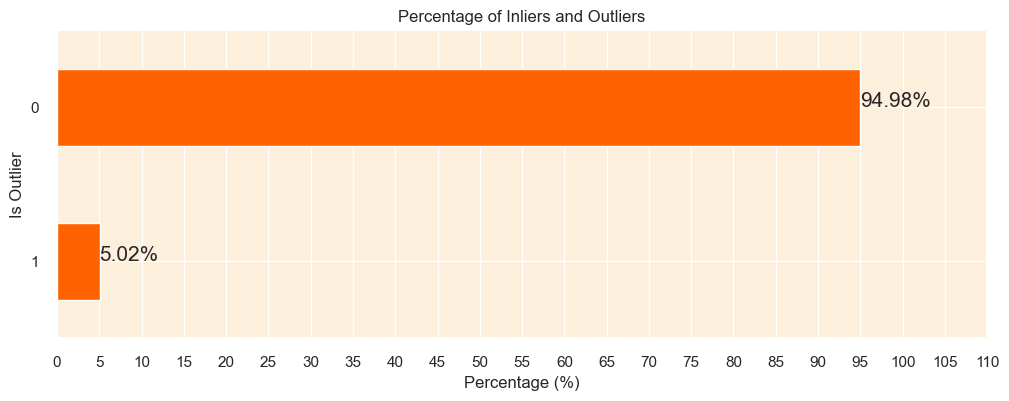

In [50]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Inference:
From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Strategy:
Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis.

### Steps to Implement:

1. **Separate the identified outliers for further analysis**:
   - Save the outliers as a separate file for potential further review and analysis (optional).
   
2. **Remove the outliers from the main dataset**:
   - Remove the identified outliers to ensure they do not influence the clustering process.

3. **Drop the Outlier_Scores and Is_Outlier columns**:
   - These columns were auxiliary during the outlier detection process and are no longer needed for the clustering analysis.

By executing these steps, the dataset will be cleaner and more suitable for clustering analysis, improving the quality of customer segmentation.



In [51]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### We have successfully separated the outliers for further analysis and cleaned our main dataset by removing these outliers. This cleaned dataset is now ready for the next steps in our customer segmentation project, which includes scaling the features and applying clustering algorithms to identify distinct customer segments.

In [52]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4067

## Step 6 | Correlation Analysis

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Pre-Clustering Step: Correlation Analysis

Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of multicollinearity, where features are highly correlated, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

### Plan for Handling Multicollinearity:

1. **Correlation Matrix**:
   - Compute the correlation matrix to identify features that are highly correlated with each other.

2. **Identifying Multicollinearity**:
   - Look for pairs of features with high correlation (typically above 0.9). These pairs may indicate multicollinearity, which can degrade clustering performance.

3. **Handling Multicollinearity**:
   - If multicollinearity is identified, use **dimensionality reduction techniques like PCA (Principal Component Analysis)** to transform the correlated features into a new set of uncorrelated variables. This will help neutralize the effect of multicollinearity and retain most of the data's variance.

4. **Improving Clustering Efficiency**:
   - Applying PCA will make the clustering process computationally efficient and potentially lead to more meaningful clusters.

By addressing multicollinearity, we aim to improve the overall clustering quality and avoid potential issues in the final segmentation.


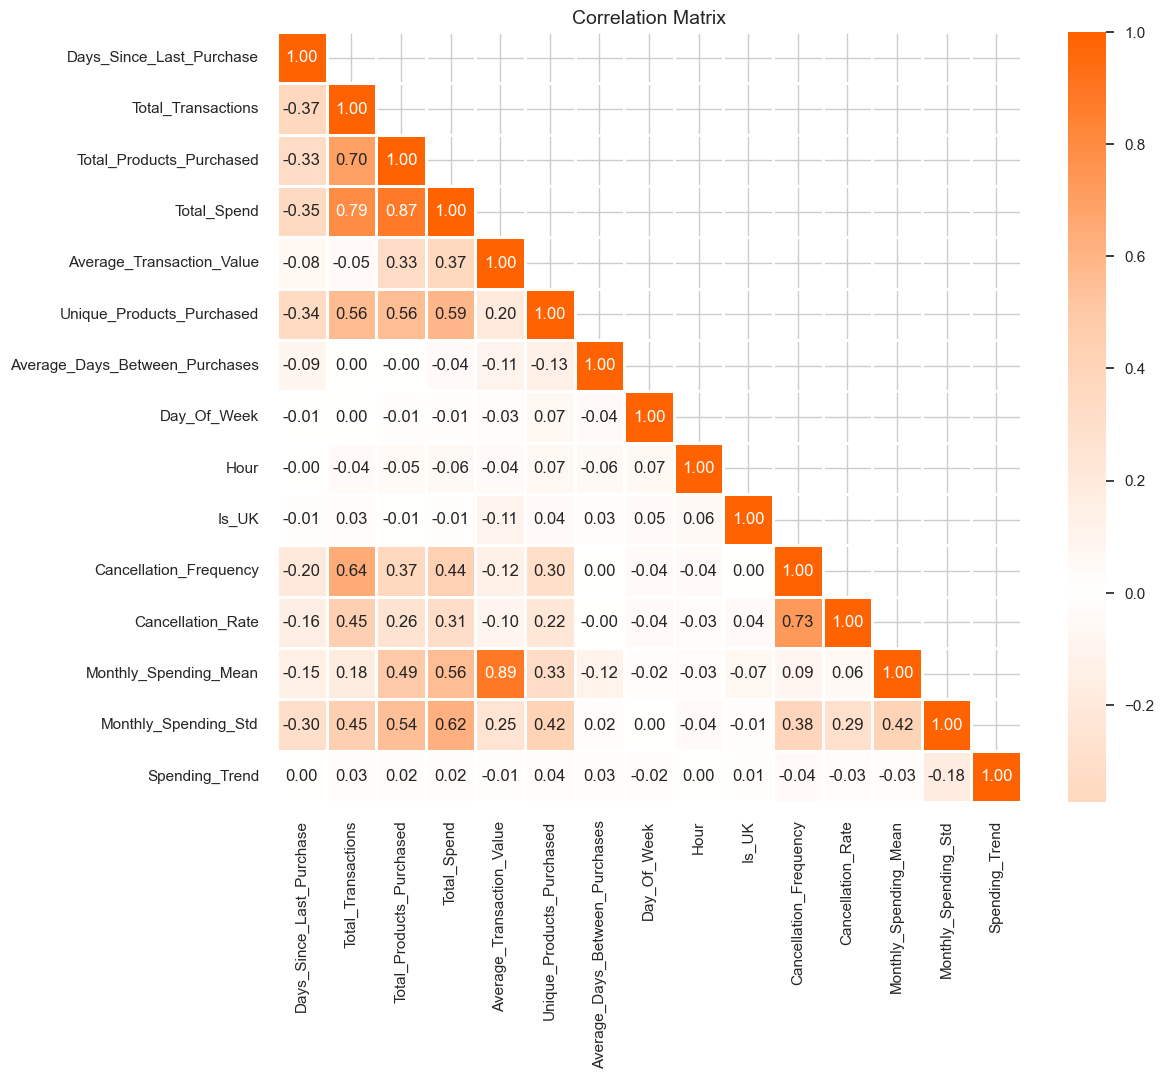

In [53]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Inference on Multicollinearity:

Looking at the heatmap, we can see that there are some pairs of variables that have high correlations. Specifically:

1. **Monthly_Spending_Mean and Average_Transaction_Value**
2. **Total_Spend and Total_Products_Purchased**
3. **Total_Transactions and Total_Spend**
4. **Cancellation_Rate and Cancellation_Frequency**
5. **Total_Transactions and Total_Products_Purchased**

These high correlations indicate that these variables move closely together, implying a degree of multicollinearity. This suggests that some of these features are capturing similar information, which could affect the clustering process and lead to less distinct clusters.

### Next Step:
To mitigate the impact of multicollinearity, we should consider applying **Principal Component Analysis (PCA)** to reduce the dimensionality and neutralize the effect of correlated features while retaining the majority of the variance in the dataset. This will help in improving the clustering process and the overall quality of the customer segmentation.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

#### Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process.

## Step 7 | Feature Scaling

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Importance of Scaling Features:

Before proceeding with K-means clustering and dimensionality reduction (PCA), it is crucial to **scale the features**. This is especially important because:

#### 1. **K-means Clustering**:
- **Distance-based Algorithm**: K-means clustering relies on the concept of distance between data points to group them into clusters. If the features are not on the same scale, features with larger values will dominate the distance calculations, potentially distorting the clustering process and leading to inaccurate groupings.
  
#### 2. **PCA (Principal Component Analysis)**:
- **Variance-based Transformation**: PCA works by identifying the directions (principal components) where the data varies the most. If the features are not scaled, those with larger values will dominate the principal components, and the true underlying patterns might not be captured properly.

### Next Step:
To ensure fair treatment of all features during clustering and dimensionality reduction, we will scale the features using **StandardScaler**, which normalizes the features to have a mean of 0 and a standard deviation of 1. This will allow the algorithms to treat all features equally and produce more meaningful results.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Methodology for Feature Scaling:

To ensure a balanced influence of all features on the clustering model and to reveal the true patterns in the data, I will **standardize** the data, transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features require scaling, and here are the exceptions and the reasons for their exclusion:

#### Features Excluded from Scaling:
1. **CustomerID**: This feature is simply an identifier for the customers and doesn't provide meaningful information for clustering, so it doesn't need scaling.
2. **Is_UK**: This is a binary feature indicating whether the customer is from the UK or not (0 or 1). Scaling won't affect it, as the values are already in a normalized form.
3. **Day_Of_Week**: Representing the most frequent day of the week for a customer’s transactions, this is a categorical feature represented by integers (1 to 7). Scaling would not be necessary for this feature as it doesn't imply numerical magnitude.

### Next Steps:
I will proceed with scaling the remaining features in the dataset using **StandardScaler**, preparing the data for **PCA** and **K-means clustering**.


In [54]:


# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.345802,-0.477589,-0.754491,-0.813464,-1.317106,-0.908471,-0.310564,1,-1.086929,1,0.420541,0.417623,-1.329018,-0.713318,0.090868
1,12347.0,-0.905575,0.707930,2.005048,2.366920,1.528132,0.815119,-0.128438,1,0.647126,0,-0.545753,-0.432111,0.989511,1.259961,0.116774
2,12348.0,-0.170744,-0.003381,1.863591,0.247087,0.343279,-0.570512,0.672476,3,2.814696,0,-0.545753,-0.432111,0.023997,0.466213,-0.491708
3,12349.0,-0.744516,-0.714692,-0.047205,0.262074,5.418285,0.291283,-0.310564,0,-1.520443,0,-0.545753,-0.432111,4.159521,-0.713318,0.090868
4,12350.0,2.194809,-0.714692,-0.534446,-0.596223,0.043327,-0.655002,-0.310564,2,1.514154,0,-0.545753,-0.432111,-0.220428,-0.713318,0.090868


## Step 8 | Dimensionality Reduction

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">


### Why We Need Dimensionality Reduction?

1. **Multicollinearity Detected**: 
   - In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction helps in removing redundant information and alleviating the multicollinearity issue, making the dataset more manageable for clustering.

2. **Better Clustering with K-means**: 
   - Since K-means is a distance-based algorithm, a large number of features can sometimes obscure the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means identify more compact and well-separated clusters.

3. **Noise Reduction**: 
   - By focusing only on the most important features, we can remove noise from the data, which may improve the accuracy and stability of the clusters.

4. **Enhanced Visualization**: 
   - Dimensionality reduction facilitates the visualization of customer groups in two or three dimensions, providing valuable insights into the clustering results. Reducing the data to a few principal components makes it easier to plot and analyze customer segments.

5. **Improved Computational Efficiency**: 
   - Reducing the number of features accelerates computation during the modeling process, making the clustering algorithm more efficient, especially when working with large datasets.

### Next Steps:
We will proceed by selecting an appropriate dimensionality reduction method for our data, such as **Principal Component Analysis (PCA)**, to prepare it for K-means clustering.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Which Dimensionality Reduction Method?

In this step, we are considering the application of dimensionality reduction techniques to simplify our data while retaining the essential information. Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, we are starting with **PCA (Principal Component Analysis)**. Here's why:

1. **Linear Relationships**: PCA is an excellent starting point because it effectively captures linear relationships in the data, which is particularly relevant given the multicollinearity we identified in our dataset. It helps in reducing the number of features while retaining a significant portion of the information.
   
2. **Improved Clustering**: PCA will potentially improve the accuracy and interpretability of our clustering analysis. By reducing the dimensionality, we can make the clusters more distinct and focused on the most important features.
   
3. **Computational Efficiency**: PCA is computationally efficient and won't significantly increase the processing time, making it a good fit for large datasets.

4. **Exploring Non-linear Methods**: After applying PCA, if we find that the first few components do not capture a significant amount of variance (implying the loss of important information), we will explore other non-linear dimensionality reduction techniques like KernelPCA, ISOMAP, TSNE, or UMAP. These methods could capture more complex patterns in the data, though at the cost of increased computational complexity.

### Next Steps:
We will begin by applying PCA to reduce the dimensions of our dataset and evaluate the results. Based on the outcome, we will decide whether to explore other dimensionality reduction techniques.


## Methodology
 - I will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:

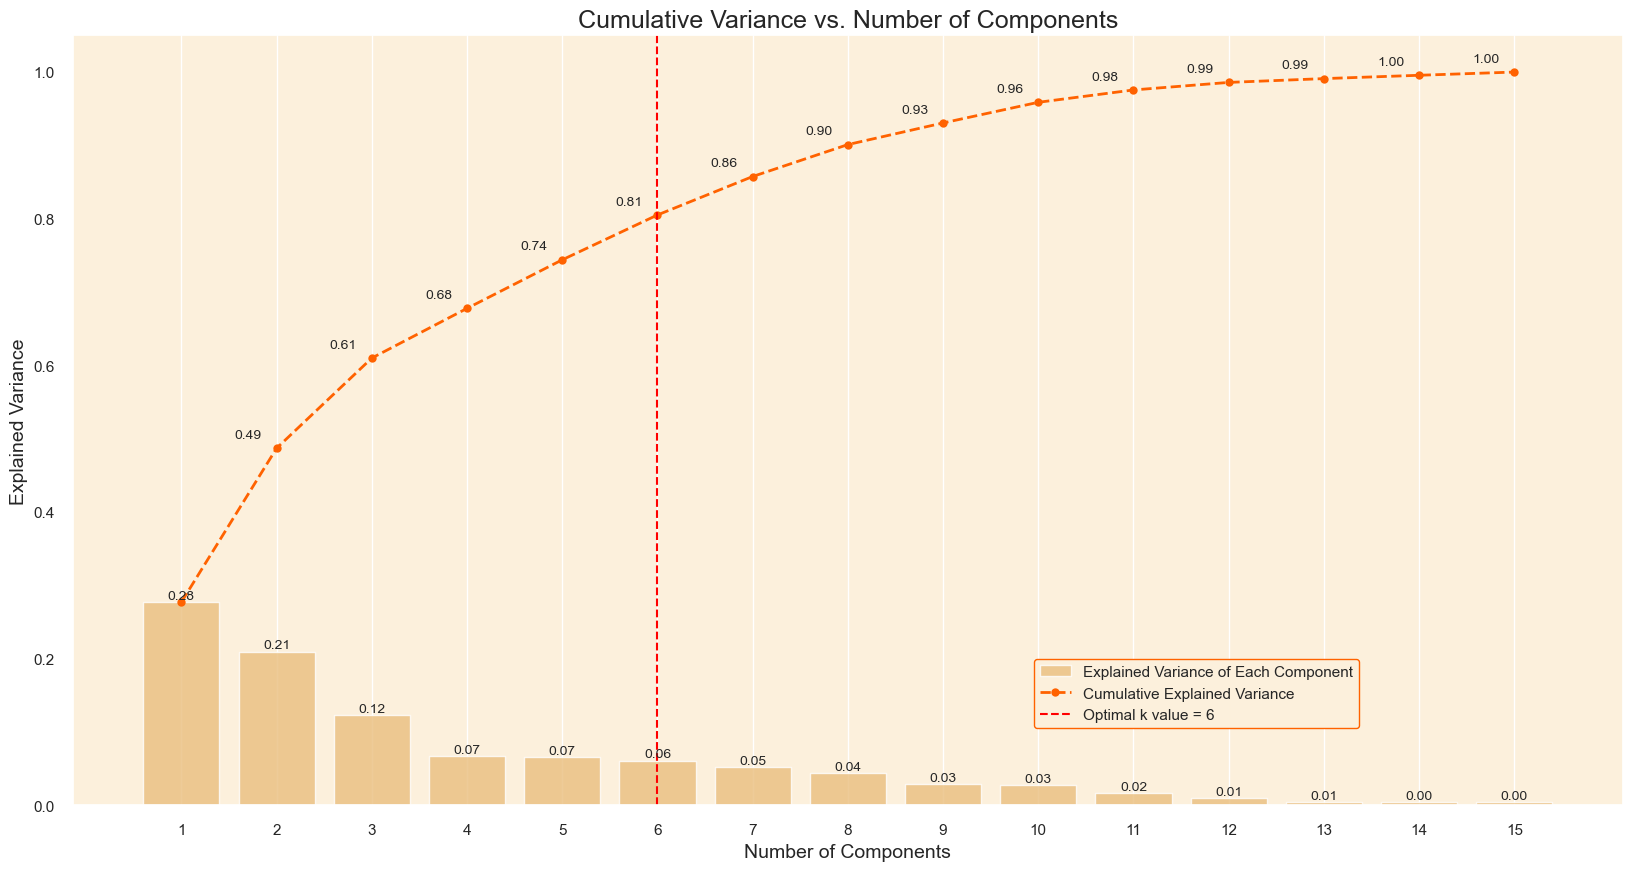

In [55]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))
# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')
# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200') 

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Conclusion

The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

- The **first component** explains approximately **28%** of the variance.
- The **first two components** together explain about **49%** of the variance.
- The **first three components** explain approximately **61%** of the variance, and so on.

To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "elbow point" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the **6th component** (which captures about **81%** of the total variance).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, **retaining the first 6 components** might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.


In [56]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [57]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.186469,-1.705370,-1.576745,-1.008187,-0.411803,-1.658012
12347.0,3.290264,-1.387375,1.923310,0.930990,-0.010591,0.873150
12348.0,0.584684,0.585019,0.664727,0.655411,-0.470280,2.306657
12349.0,1.791116,-2.695652,5.850040,-0.853418,0.677111,-1.520098
12350.0,-1.997139,-0.542639,0.578781,-0.183682,-1.484838,0.062672


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Now, let's extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA:

In [58]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.217859,-0.013986,0.067660,-0.273430,-0.240968,-0.373059
Total_Transactions,0.380301,0.014759,-0.259180,0.138165,-0.017356,-0.028257
Total_Products_Purchased,0.401425,0.007365,0.069133,0.134806,0.057476,-0.013373
Total_Spend,0.431260,0.010159,0.065165,0.092047,0.025202,-0.036947
Average_Transaction_Value,0.176225,-0.015544,0.589050,-0.114307,0.021847,-0.101738
Unique_Products_Purchased,0.324992,0.063346,0.014010,0.230502,-0.193981,0.124604
Average_Days_Between_Purchases,-0.022600,-0.036007,-0.127341,0.160627,0.753462,0.211787
Day_Of_Week,-0.026572,0.994650,-0.006591,-0.028870,0.058359,-0.060799
Hour,-0.024259,0.056388,-0.002019,0.226832,-0.528881,0.621915
Is_UK,-0.001014,0.007435,-0.018378,0.013419,-0.005353,0.014384


## Step 9 | K-Means Clustering



<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## K-Means:
 - K-Means is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the within-cluster sum-of-squares (WCSS), also known as inertia. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Drawbacks of K-Means and Solutions:

1️⃣ **Inertia is influenced by the number of dimensions**: The value of inertia tends to increase in high-dimensional spaces due to the curse of dimensionality, which can distort the Euclidean distances between data points.  
**Solution**: Perform dimensionality reduction, such as PCA, before applying K-means to alleviate this issue and speed up computations.

2️⃣ **Dependence on Initial Centroid Placement**: The K-means algorithm might find a local minimum instead of a global minimum, based on where the centroids are initially placed.  
**Solution**: To enhance the likelihood of locating the global minimum, use the **k-means++** initialization method.

3️⃣ **Requires Specifying the Number of Clusters**: K-means requires specifying the number of clusters (K) beforehand, which may not be known in advance.  
**Solution**: Use methods such as the **elbow method** and **silhouette analysis** to estimate the optimal number of clusters.

4️⃣ **Sensitivity to Unevenly Sized or Sparse Clusters**: K-means might struggle with clusters of different sizes or densities.  
**Solution**: Increase the number of random initializations (**n_init**) or consider using algorithms that handle unevenly sized clusters better, such as **Gaussian Mixture Models (GMM)** or **DBSCAN**.

5️⃣ **Assumes Convex and Isotropic Clusters**: K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.  
**Solution**: Consider using clustering algorithms that do not make these assumptions, such as **DBSCAN** or **Gaussian Mixture Models (GMM)**.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">


#### Taking into account the aforementioned considerations, I initially applied PCA to the dataset. For the KMeans algorithm, I will set the init parameter to k-means++ and n_init to 10. To determine the optimal number of clusters, I will employ the elbow method and silhouette analysis. Additionally, it might be beneficial to explore the use of alternative clustering algorithms such as GMM and DBSCAN in future analyses to potentially enhance the segmentation results.

## Step 9.1 | Determining the Optimal Number of Clusters¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

- Elbow Method

- Silhouette Method

It's common to utilize both methods in practice to corroborate the results

## Step 9.1.1 | Elbow Method¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### What is the Elbow Method?
- The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "Elbow Method". The elbow point represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Utilizing the YellowBrick Library
- In this section, I will employ the YellowBrick library to facilitate the implementation of the Elbow method. YellowBrick, an extension of the Scikit-Learn API, is renowned for its ability to rapidly generate insightful visualizations in the field of machine learning.

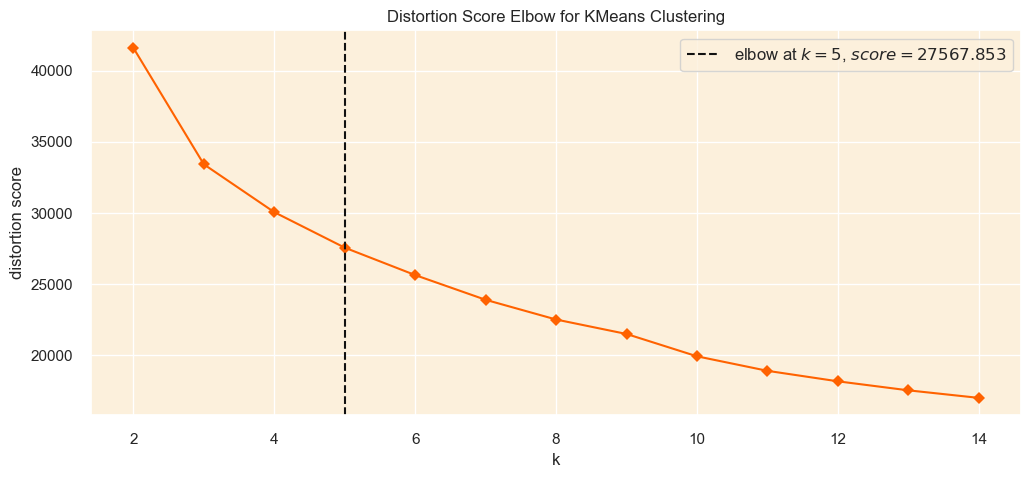

In [59]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Optimal k Value: Elbow Method Insights
- The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is 5. However, we don't have a very distinct elbow point in this case, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that the optimum value of k could be between 3 and 7. To choose the best k within this range, we can employ the silhouette analysis, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

## Step 9.1.2 | Silhouette Method¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## What is the Silhouette Method?

The Silhouette Method is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the silhouette coefficient for each data point, which measures how similar a point is to its own cluster compared to other clusters.

### What is the Silhouette Coefficient?

To determine the silhouette coefficient for a given point *i*, follow these steps:

1. **Calculate a(i)**: Compute the average distance between point *i* and all other points within its cluster.
2. **Calculate b(i)**: Compute the average distance between point *i* and all points in the nearest cluster to its own.
3. **Compute the silhouette coefficient, s(i)**, for point *i* using the following formula:

   The formula for the Silhouette Coefficient is: 
$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$


   The silhouette coefficient quantifies the similarity of a point to its own cluster (cohesion) relative to its separation from other clusters. This value ranges from -1 to 1, with higher values signifying that the point is well aligned with its cluster and has a low similarity to neighboring clusters.

### What is the Silhouette Score?

The **silhouette score** is the average silhouette coefficient calculated for all data points in a dataset. It provides an overall assessment of the clustering quality, taking into account both cohesion within clusters and separation between clusters. A higher silhouette score indicates a better clustering configuration.

### Advantages of the Silhouette Method over the Elbow Method

- **Comprehensive Measure**: The Silhouette Method evaluates cluster quality by considering both the cohesion within clusters and their separation from other clusters. This provides a more comprehensive measure of clustering performance compared to the Elbow Method, which only considers the inertia (sum of squared distances within clusters).
  
- **Direct Quantification**: The Silhouette Method produces a silhouette score that directly quantifies the quality of clustering, making it easier to compare different values of *k*. In contrast, the Elbow Method relies on the subjective interpretation of the elbow point, which can be less reliable in cases where the plot does not show a clear elbow.
  
- **Visual Representation**: The Silhouette Method generates a visual representation of silhouette coefficients for each data point, allowing for easier identification of fluctuations and outliers within clusters. This helps in determining the optimal number of clusters with higher confidence, as opposed to the Elbow Method, which relies on visual inspection of the inertia plot.


In [60]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []
    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
    
    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

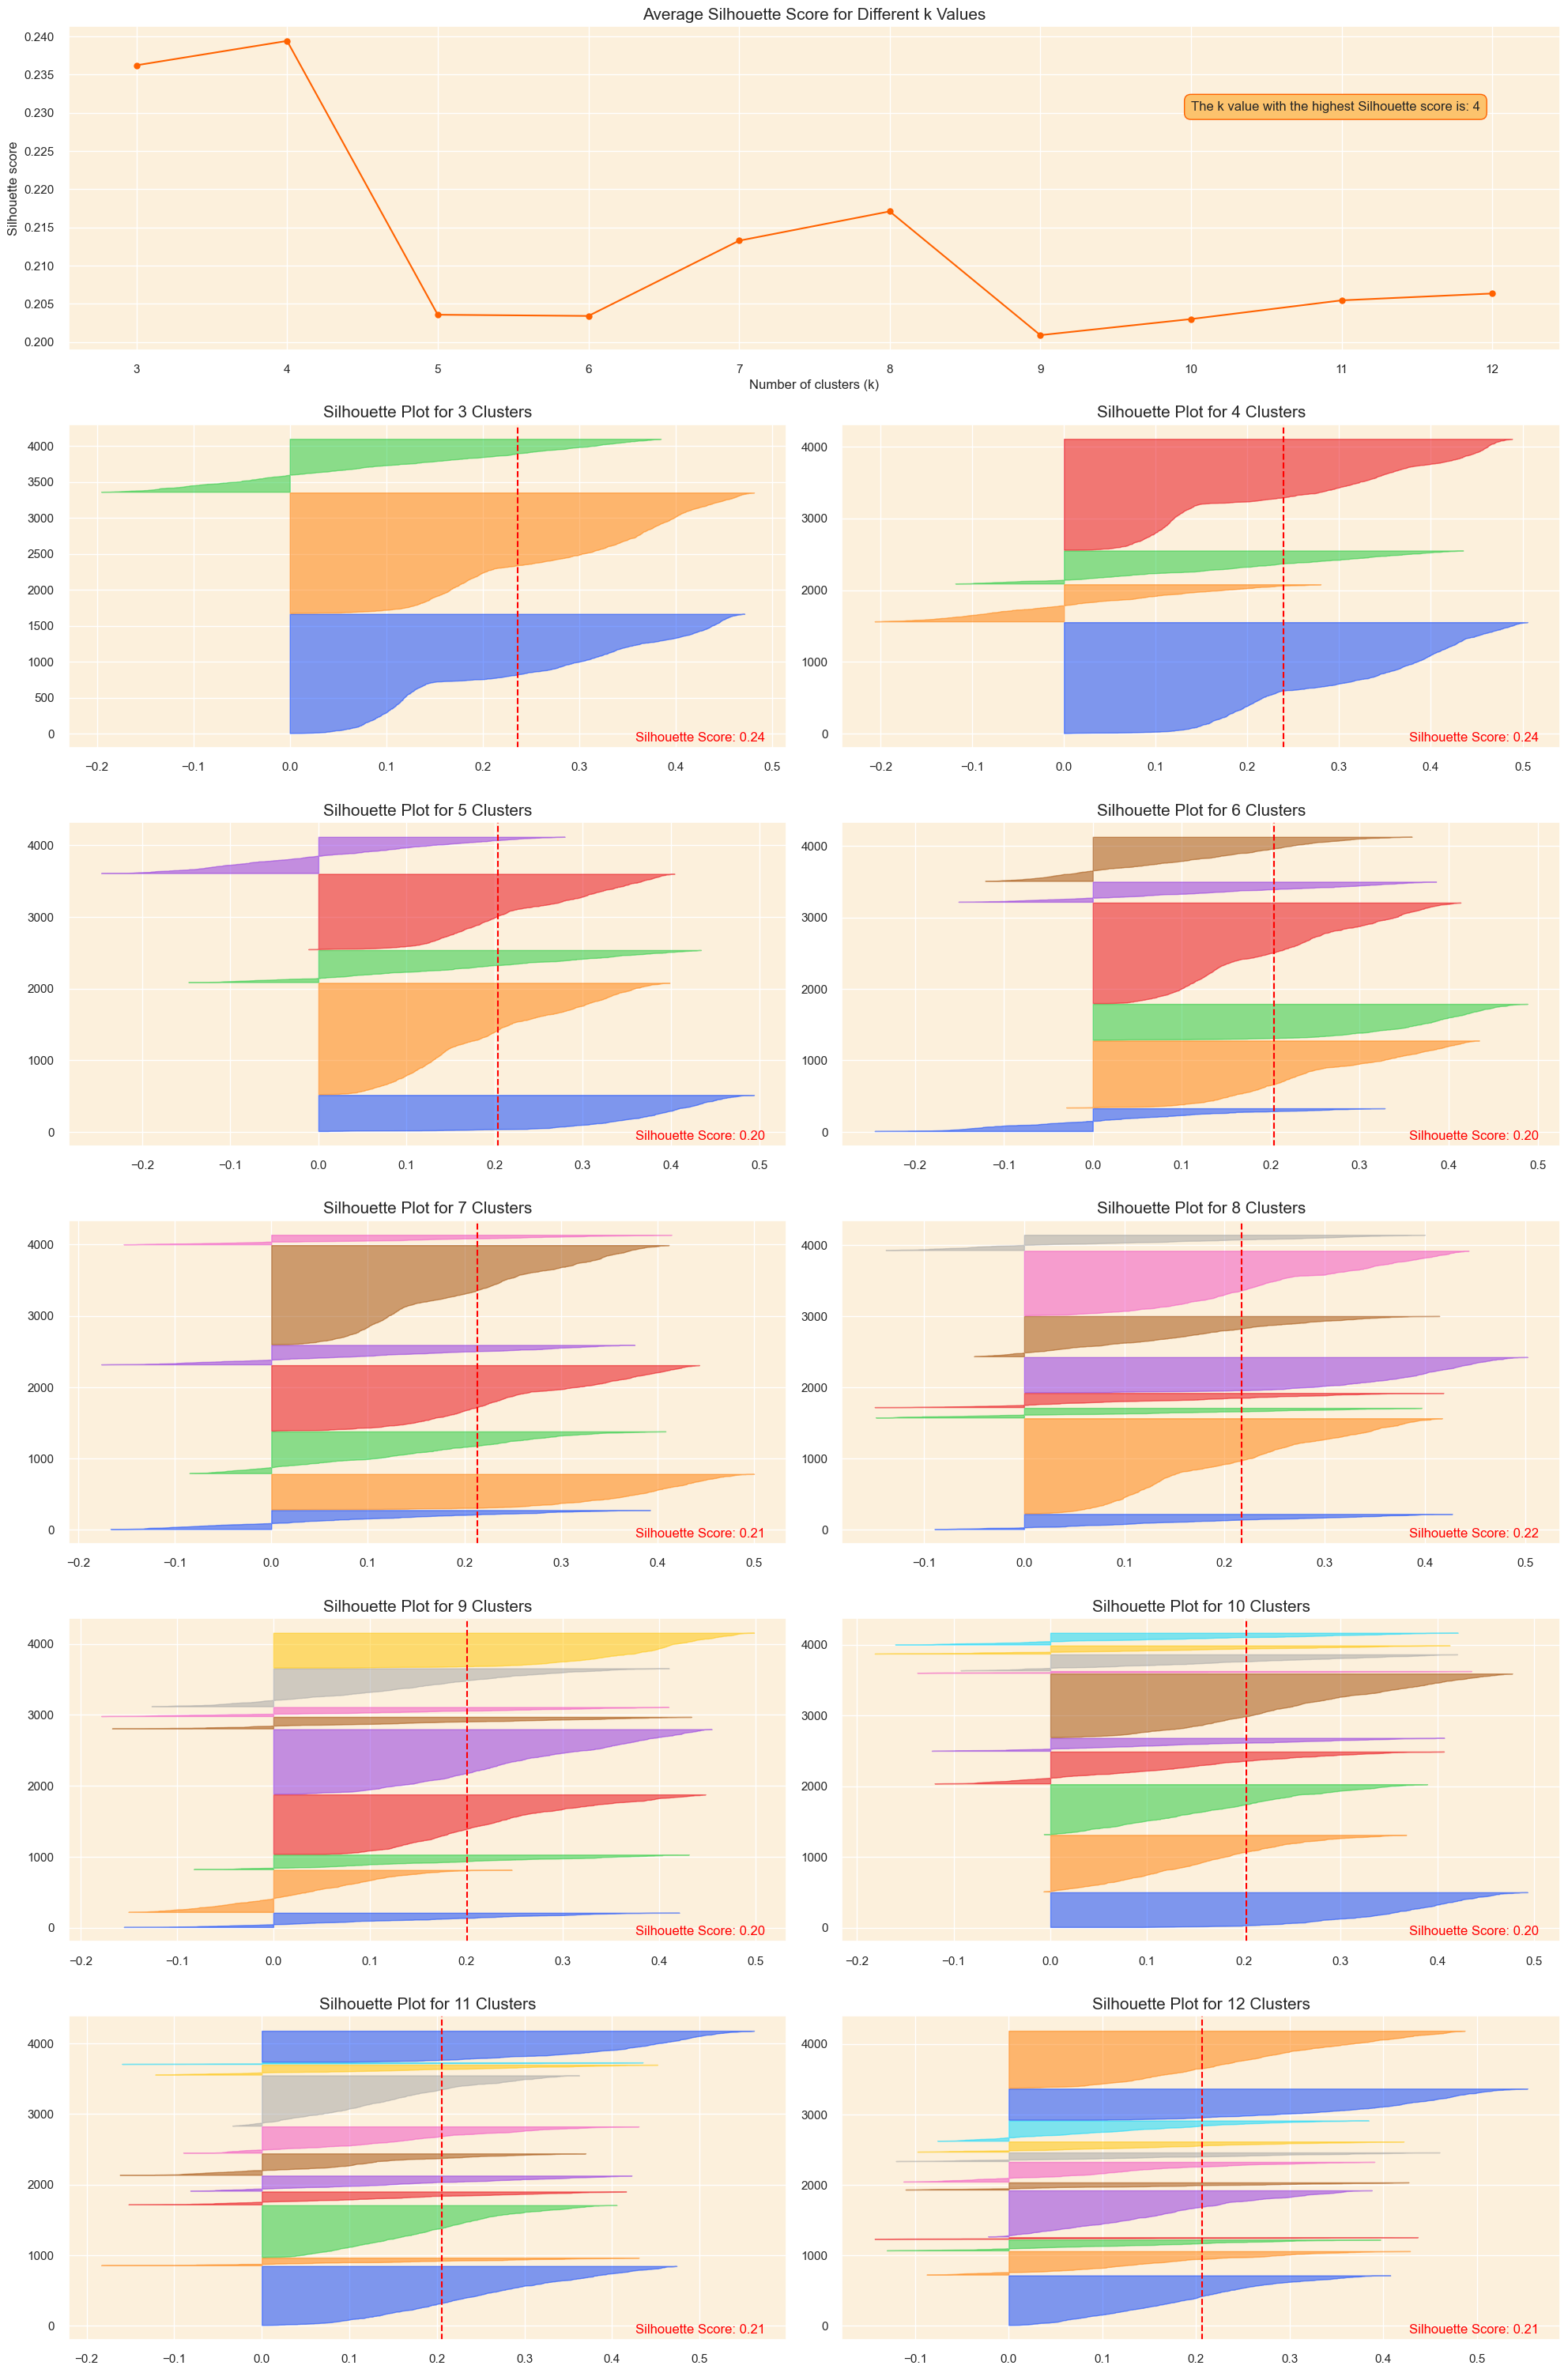

In [61]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">


### 1️⃣ Analyze the Silhouette Plots:

**Silhouette Score Width:**

- **Wide Widths (closer to +1)**: Indicate that the data points in the cluster are well separated from points in other clusters, suggesting well-defined clusters.
- **Narrow Widths (closer to -1)**: Show that data points in the cluster are not distinctly separated from other clusters, indicating poorly defined clusters.

**Average Silhouette Score:**

- **High Average Width**: A cluster with a high average silhouette score indicates well-separated clusters.
- **Low Average Width**: A cluster with a low average silhouette score indicates poor separation between clusters.

### 2️⃣ Uniformity in Cluster Size:

**Cluster Thickness:**

- **Uniform Thickness**: Indicates that clusters have a roughly equal number of data points, suggesting a balanced clustering structure.
- **Variable Thickness**: Signifies an imbalance in the data point distribution across clusters, with some clusters having many data points and others too few.

### 3️⃣ Peaks in Average Silhouette Score:

**Clear Peaks**: A clear peak in the average silhouette score plot for a specific k value indicates this k might be optimal.

### 4️⃣ Minimize Fluctuations in Silhouette Plot Widths:

**Uniform Widths**: Seek silhouette plots with similar widths across clusters, suggesting a more balanced and optimal clustering.

**Variable Widths**: Avoid wide fluctuations in silhouette plot widths, indicating that clusters are not well-defined and may vary in compactness.

### 5️⃣ Optimal Cluster Selection:

**Maximize the Overall Average Silhouette Score**: Choose the k value that gives the highest average silhouette score across all clusters, indicating well-defined clusters.

**Avoid Below-Average Silhouette Scores**: Ensure most clusters have above-average silhouette scores to prevent suboptimal clustering structures.

### 6️⃣ Visual Inspection of Silhouette Plots:

**Consistent Cluster Formation**: Visually inspect the silhouette plots for each k value to evaluate the consistency and structure of the formed clusters.

**Cluster Compactness**: Look for more compact clusters, with data points having silhouette scores closer to +1, indicating better clustering.

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Optimal k Value: Silhouette Method Insights
- Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing ( k = 3 ) is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

## Step 9.2 | Clustering Model - K-means¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

- In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

- It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [62]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [63]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,2
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,2
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,2


## Step 10 | Clustering Evaluation



<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

To evaluate the clustering results and validate the quality of the clusters, the following steps will be taken:

### 1️⃣ **3D Visualization of Top Principal Components (PCs)**
Using the first three principal components obtained through PCA, we will create a 3D scatter plot. This visualization will provide an intuitive view of the cluster separation in the reduced feature space. Each cluster will be represented by a different color, helping us visually assess the coherence and separation of the clusters.

### 2️⃣ **Cluster Distribution Visualization**
A cluster distribution plot will show how the data points are distributed across the clusters. This will help in understanding the proportion of data points assigned to each cluster and identify if any cluster is disproportionately large or small. It also provides insights into the density of clusters.

### 3️⃣ **Evaluation Metrics**

We will use the following evaluation metrics to quantitatively assess the clustering quality:

- **Silhouette Score**: Measures the cohesion and separation of the clusters. A higher score indicates well-defined clusters.
- **Calinski-Harabasz Score**: A higher score indicates a better-defined clustering configuration, balancing intra-cluster cohesion and inter-cluster separation.
- **Davies-Bouldin Score**: A lower value indicates better clustering. It is a measure of the average similarity ratio between clusters, where lower values indicate that the clusters are well separated and distinct.

#### Note:
Since we performed clustering in the PCA-reduced space, we will evaluate the clustering quality in this space. This ensures that we are assessing the clustering results based on the most significant features, which capture the essential patterns in the data. This approach gives a more accurate and representative measure of cluster quality, and it also facilitates clearer visualization in the reduced-dimensional space.

Let's proceed with these steps to evaluate the clustering results effectively.

## Step 10.1 | 3D Visualization of Top Principal Components

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## In this part, I am going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:

In [64]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [65]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

## Step 10.2 | Cluster Distribution Visualization¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

#### I am going to utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:



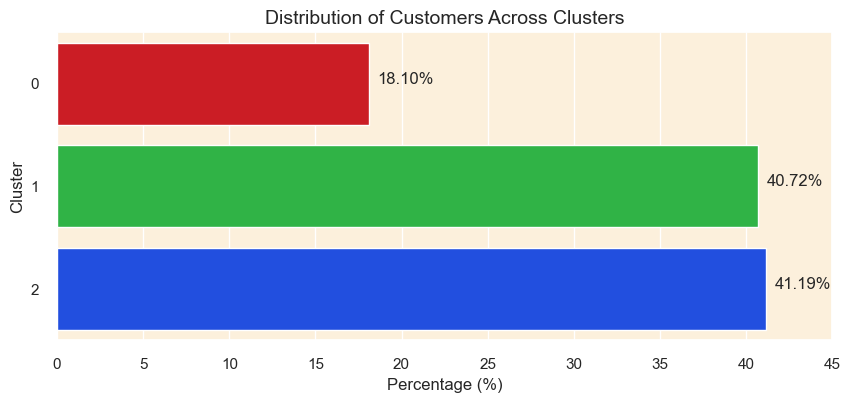

In [66]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Inference
- The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with clusters 0 and 1 holding around 41% of customers each and cluster 2 accommodating approximately 18% of the customers.

- This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

- Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.

## Step 10.3 | Evaluation Metrics¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## To further scrutinize the quality of our clustering, I will employ the following metrics:

- Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
- Calinski Harabasz Score: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.
- Davies Bouldin Score: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [67]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]
# Print the table
print(tabulate(table_data, headers=["Metric",  "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |        4067         |
|    Silhouette Score     | 0.23622848017098874 |
| Calinski Harabasz Score | 1257.1747766540636  |
|  Davies Bouldin Score   | 1.3682695376074665  |
+-------------------------+---------------------+


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Clustering Quality Inference

The Silhouette Score of approximately 0.236, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.

The Calinski Harabasz Score is 1257.17, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.

The Davies Bouldin Score of 1.37 is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.

In conclusion, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.


## Step 11 | Cluster Analysis and Profiling

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### In this section, I am going to analyze the characteristics of each cluster to understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the key traits that define the customers in each cluster.

## Step 11.1 | Radar Chart Approach¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## First of all, I am going to create radar charts to visualize the centroid values of each cluster across different features. This can give a quick visual comparison of the profiles of different clusters.To construct the radar charts, it's essential to first compute the centroid for each cluster. This centroid represents the mean value for all features within a specific cluster. Subsequently, I will display these centroids on the radar charts, facilitating a clear visualization of the central tendencies of each feature across the various clusters:

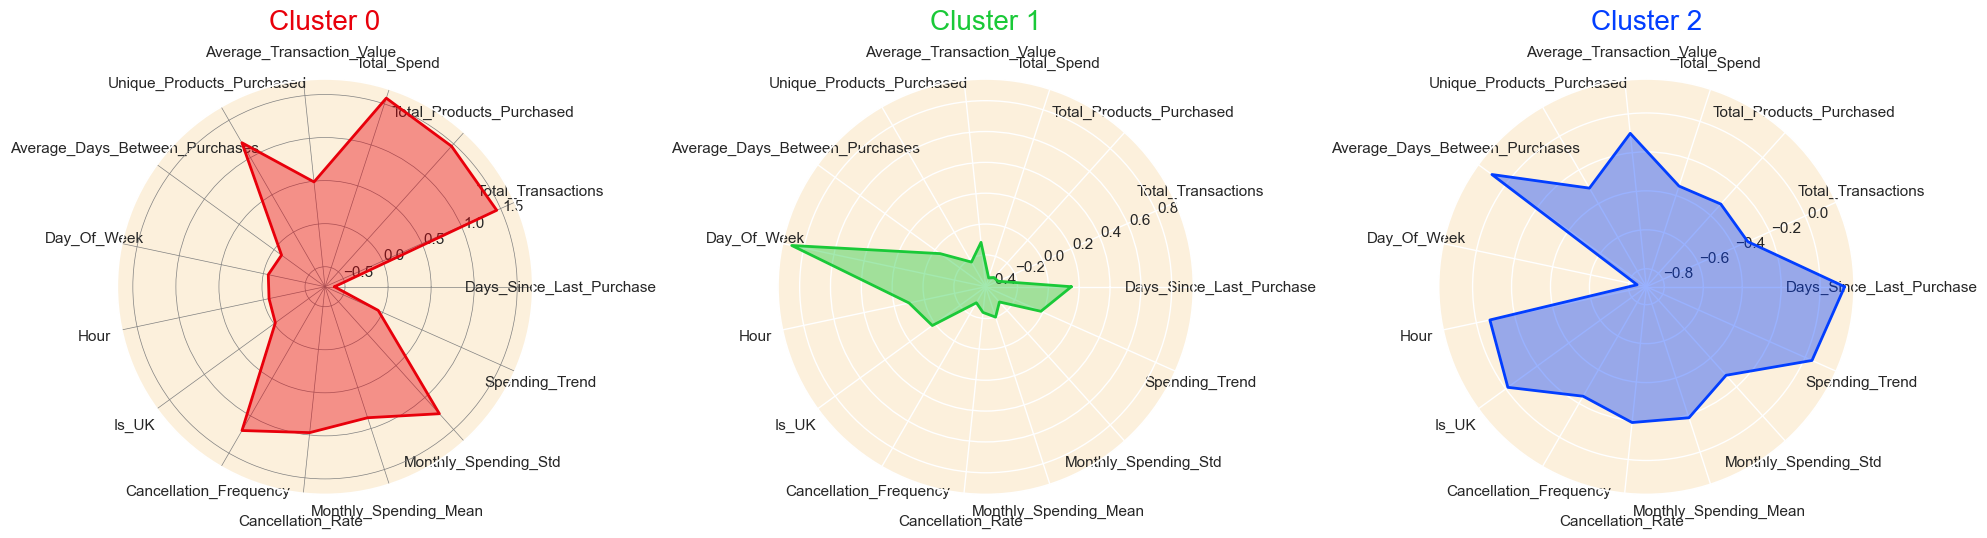

In [68]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)
# Display the plot
plt.tight_layout()
plt.show()

<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

## Customer Profiles Derived from Radar Chart Analysis

### Cluster 0 (Red Chart):
🎯 **Profile:** Sporadic Shoppers with a Preference for Weekend Shopping

- Customers in this cluster tend to spend less, with a lower number of transactions and products purchased.
- They have a slight tendency to shop during the weekends, as indicated by the very high `Day_of_Week` value.
- Their spending trend is relatively stable but on the lower side, and they have a low monthly spending variation (`Monthly_Spending_Std`).
- These customers have not engaged in many cancellations, showing a low cancellation frequency and rate.
- The average transaction value is on the lower side, indicating that when they do shop, they tend to spend less per transaction.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Cluster 1 (Green Chart):
🎯 **Profile:** Infrequent Big Spenders with a High Spending Trend

- Customers in this cluster show a moderate level of spending, but their transactions are not very frequent, as indicated by the high `Days_Since_Last_Purchase` and `Average_Days_Between_Purchases`.
- They have a very high spending trend, indicating that their spending has been increasing over time.
- These customers prefer shopping late in the day, as indicated by the high `Hour` value, and they mainly reside in the UK.
- They have a tendency to cancel a moderate number of transactions, with a medium cancellation frequency and rate.
- Their average transaction value is relatively high, meaning that when they shop, they tend to make substantial purchases.


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

### Cluster 2 (Blue Chart):
🎯 **Profile:** Frequent High-Spenders with a High Rate of Cancellations

- Customers in this cluster are high spenders with a very high total spend, and they purchase a wide variety of unique products.
- They engage in frequent transactions, but also have a high cancellation frequency and rate.
- These customers have a very low average time between purchases, and they tend to shop early in the day (low `Hour` value).
- Their monthly spending shows high variability, indicating that their spending patterns might be less predictable compared to other clusters.
- Despite their high spending, they show a low spending trend, suggesting that their high spending levels might be decreasing over time.


## Step 11.2 | Histogram Chart Approach¶


<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">


#### To validate the profiles identified from the radar charts, we can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster, thereby confirming or refining the profiles we have created based on the radar charts.

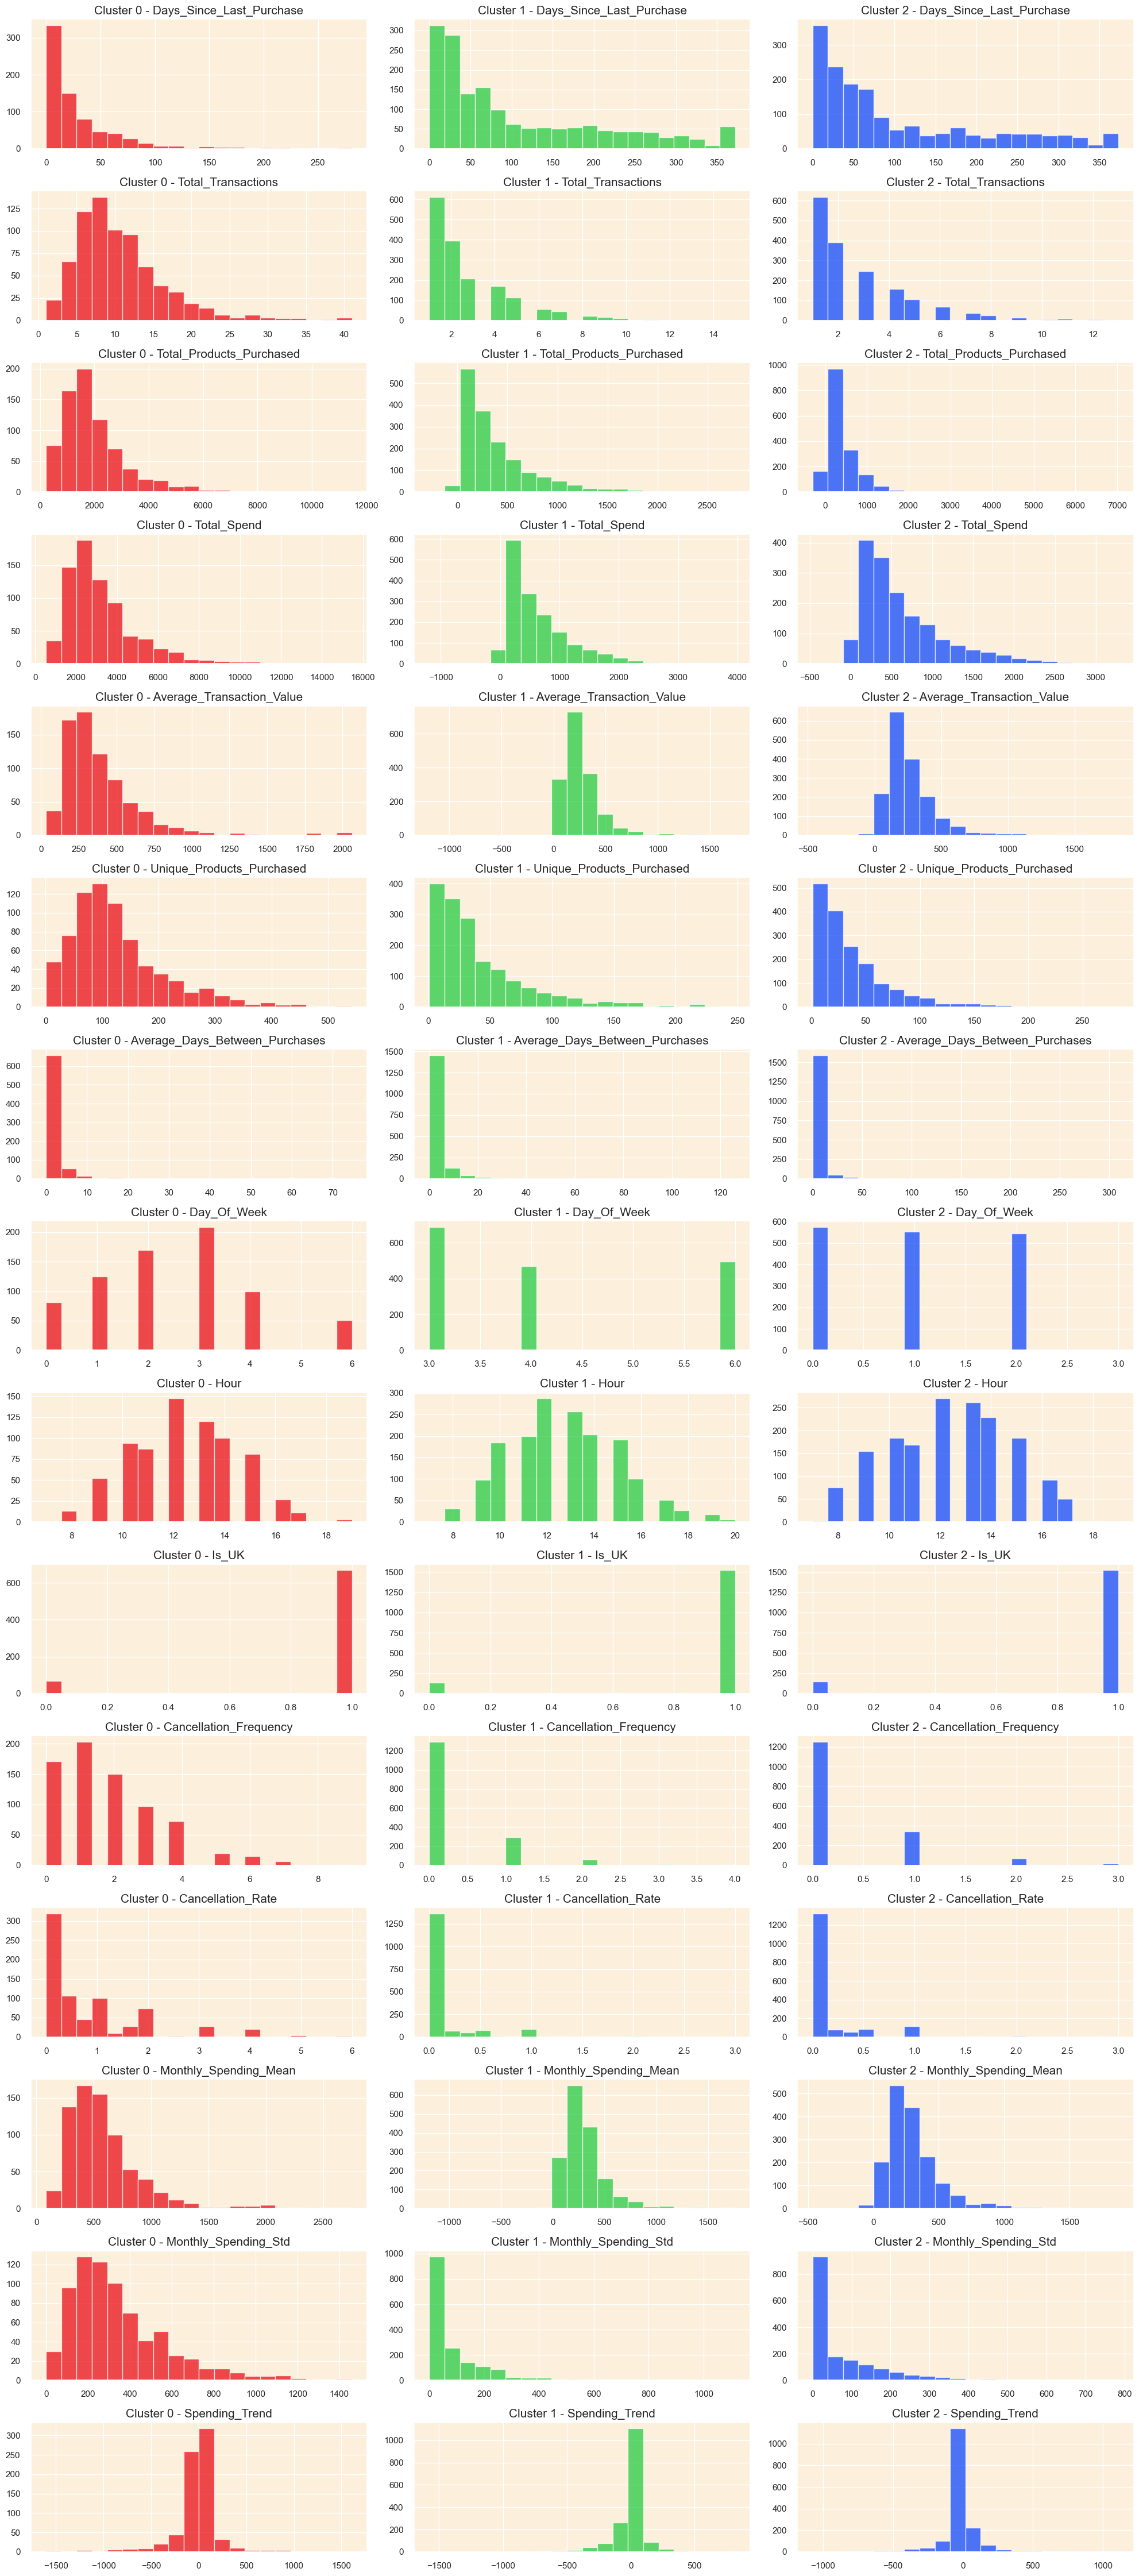

In [69]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

## Step 12 | Recommendation System



<div style="background-color:rgb(41, 120, 184); padding: 15px; border-radius: 10px;">

- In the final phase of this project, I am set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters. Earlier in the project, during the customer data preparation stage, I isolated a small fraction (5%) of the customers identified as outliers and reserved them in a separate dataset called outliers_data.

- Now, focusing on the core 95% of the customer group, I analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting the top three products popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales. For the outlier group, a basic approach could be to recommend random products, as a starting point to engage them.

In [70]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [71]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
13243.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
13232.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
14997.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14948.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
12596.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
16686.0,22616,PACK OF 12 LONDON TISSUES,85099B,JUMBO BAG RED RETROSPOT,84879,ASSORTED COLOUR BIRD ORNAMENT
17101.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14954.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
18123.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
